In [3]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import time
import yfinance as yf

In [4]:
df = pd.read_csv("tatamotors.csv")

In [5]:
df.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
0,2020-12-07 09:15:00+05:30,184.449997,186.449997,183.050003,185.350006,185.350006,0
1,2020-12-07 10:15:00+05:30,185.199997,185.550003,184.399994,184.949997,184.949997,6042838
2,2020-12-07 11:15:00+05:30,185.199997,185.300003,184.050003,184.699997,184.699997,3673533
3,2020-12-07 12:15:00+05:30,184.500000,185.300003,184.350006,184.699997,184.699997,4050294
4,2020-12-07 13:15:00+05:30,184.649994,184.899994,182.699997,183.000000,183.000000,6972677


In [6]:
df.tail()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
1436,2021-10-05 14:15:00+05:30,347.950012,348.000000,345.000000,345.049988,345.049988,3082221
1437,2021-10-05 15:15:00+05:30,345.049988,345.149994,344.350006,345.000000,345.000000,1656542
1438,2021-10-06 09:15:00+05:30,347.000000,348.700012,339.000000,340.899994,340.899994,7268293
1439,2021-10-06 10:15:00+05:30,340.899994,341.750000,339.149994,341.500000,341.500000,1107938
1440,2021-10-06 10:29:40+05:30,341.600006,341.600006,341.600006,341.600006,341.600006,0


In [7]:
df= df[["Close"]].copy()

In [8]:
df

,Close
0,185.350006
1,184.949997
2,184.699997
3,184.699997
4,183.000000
...,...
1436,345.049988
1437,345.000000
1438,340.899994
1439,341.500000


In [9]:
df.describe()

,Close
count,1441.000000
mean,294.918147
std,46.661673
min,159.100006
25%,291.600006
50%,305.899994
75%,323.149994
max,359.000000


In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
result =adfuller(df.Close.dropna())
print(f"ADF statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF statistic: -2.274994302459852
p-value: 0.18015966241676162


In [12]:
result

(-2.274994302459852,
 0.18015966241676162,
 5,
 1435,
 {'1%': -3.4349151819757466,
  '5%': -2.863556216004778,
  '10%': -2.5678434198545568},
 7058.88824617226)

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

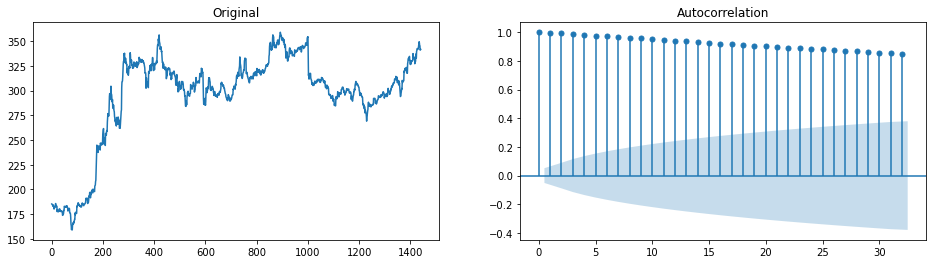

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.Close)
ax1.set_title('Original')
plot_acf(df.Close, ax=ax2);

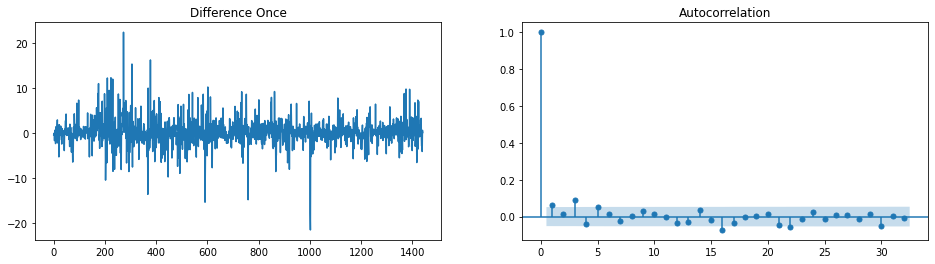

In [15]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff, ax=ax2);


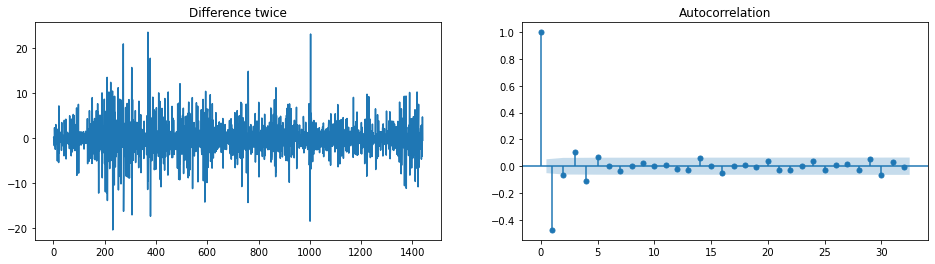

In [16]:
diff = df.Close.diff().diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2);


In [17]:
from pmdarima.arima.utils import ndiffs

In [18]:
ndiffs(df.Close, test="adf")

1

1 is the value of d.

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf

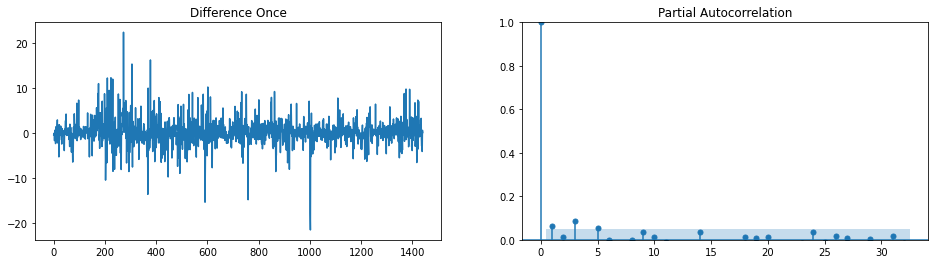

In [20]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);


from above right side graph we can see 5th line have highest height. so p value is 5

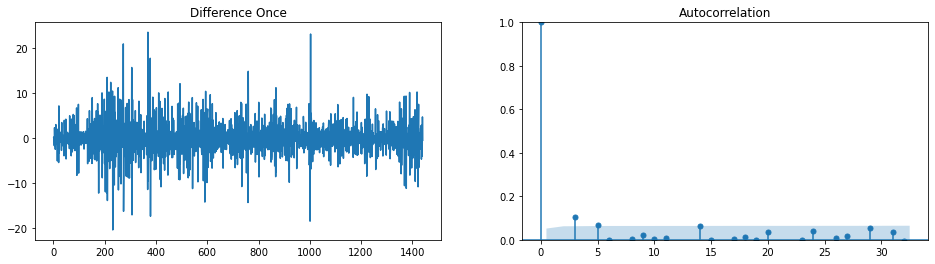

In [21]:
diff = df.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

13 can be suitable for the q value becuse of havinig medium height in graph.

p, q, d = 5, 13, 1

Fitting in arima model


In [22]:
df = df.Close.astype('float32')
best_score, best_cfg = float("inf"), None
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                mse = evaluate_arima_model(dataset, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
            except:
                continue

print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

NameError: name 'p_values' is not defined

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [99]:
model = ARIMA(df.Close, order=(5,2,1))
result = model.fit(disp=1)

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIM

In [96]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3449
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -5566.199
Method:                       css-mle   S.D. of innovations              1.215
Date:                Mon, 04 Oct 2021   AIC                          11148.398
Time:                        10:49:27   BIC                          11197.564
Sample:                             1   HQIC                         11165.958
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3752      0.054      6.974      0.000       0.270       0.481
ar.L1.D.Close     0.8826      0.046     19.014      0.000       0.792       0.974
ar.L2.D.Close     0.0075      0.023     

(array([1.44564248e-01, 6.39975143e-03, 1.75335656e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.38339139e-05]),
 array([-5.78174937,  0.83274354,  7.44723645, 14.06172936, 20.67622227,
        27.29071518, 33.90520809, 40.519701  , 47.13419392, 53.74868683,
        60.36317974]),
 <BarContainer object of 10 artists>)

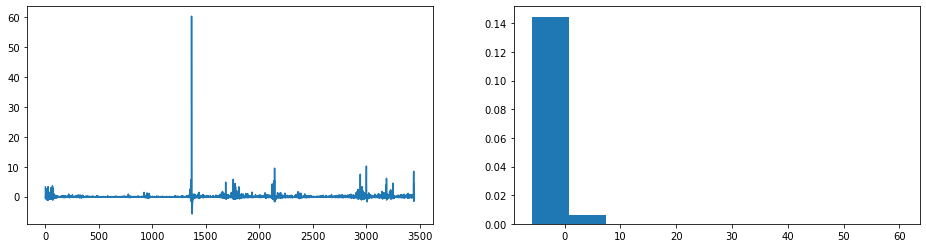

In [97]:
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density= True)

ValueError: The start index -2 of the original series  has been differenced away

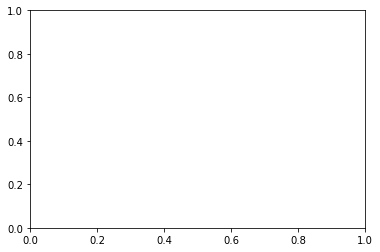

In [98]:
result.plot_predict(
    start=-1,
    end=60,
    dynamic=False,
);